In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer

**READING THE DATA**

In [6]:
data = pd.read_csv("/content/drive/MyDrive/Data Science/Machine Learning/Classification/Logistic Regression/email_classification.csv")

In [7]:
data.head()

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham
3,Your Amazon account has been locked. Click her...,spam
4,Your opinion matters! Take our survey and help...,ham


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   179 non-null    object
 1   label   179 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


**DATA CLEANING**

In [9]:
data['clean_data'] = data['email'].str.replace('^a-zA-Z\s]', '').str.lower()
data['clean_data']

,clean_data
0,upgrade to our premium plan for exclusive acce...
1,happy holidays from our team! wishing you joy ...
2,we're hiring! check out our career opportuniti...
3,your amazon account has been locked. click her...
4,your opinion matters! take our survey and help...
...,...
174,we're pleased to inform you that your refund h...
175,get rich quick! invest in our revolutionary ne...
176,your free trial period is ending soon. upgrade...
177,your order is on its way! track your shipment ...


In [11]:
vectorizer = TfidfVectorizer(stop_words='english')
X= vectorizer.fit_transform(data['clean_data'])

***VISUALIZATION***


Distribution of target variable (0 = Malignant, 1 = Benign):
label
ham     100
spam     79
Name: count, dtype: int64


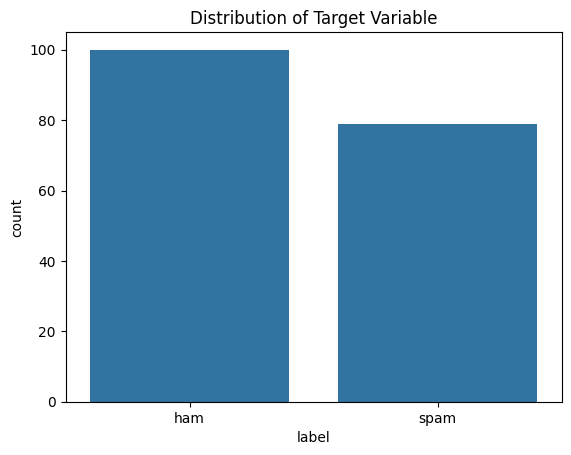

In [17]:
print("\nDistribution of target variable (0 = Malignant, 1 = Benign):")
print(data['label'].value_counts())

# Visualize the distribution of target variable
sns.countplot(x='label', data=data)
plt.title('Distribution of Target Variable')
plt.show()

***Splitting the data into training set and testing set***

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)

In [13]:
#trainthe model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

***Model Evaluation***

In [14]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


In [18]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :")
print(cm)

Confusion Matrix :
[[14  0]
 [ 6 16]]


In [19]:
crep = classification_report(y_test,y_pred)
print("Classification Report :")
print(crep)

Classification Report :
              precision    recall  f1-score   support

         ham       0.70      1.00      0.82        14
        spam       1.00      0.73      0.84        22

    accuracy                           0.83        36
   macro avg       0.85      0.86      0.83        36
weighted avg       0.88      0.83      0.83        36



In [22]:
# ROC Curve and AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob,pos_label='spam')

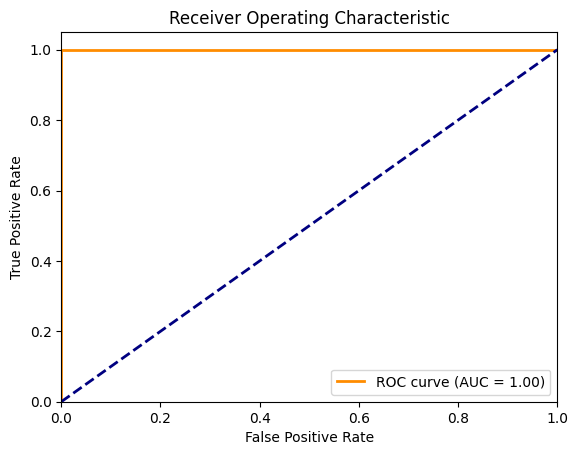

In [25]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()